In [1]:
from mcbj import *
from pca_and_ml import *
from noise import *
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, StrMethodFormatter
import pandas as pd

import plots

date = "22_03_23"
sample_rate = 50_000
# home_folder = Path(f"D:/BJ_Data/{date}")
home_folder = Path(f'//DATACENTER/BreakJunction_group/BJ_Data/{date}')

In [2]:
after_evap = np.arange(start=36002, stop=56200, step=1)

In [3]:
# calculate histogram
# hist = Histogram(folder=home_folder,
#                  traces=after_evap[:8000],  #8000
#                  conductance_range=(1e-5, 10),  # 4.229e-5
#                  conductance_bins_num=100,
#                  conductance_bins_mode='total')

# hist.calc_stats(align_at=0.5,
#                 range_pull=(-1, 1),
#                 range_push=(-0.5, 1.5))

# hist.calc_corr_hist_2d()

# hist.save_histogram(fname='hist_BPY')

In [4]:
# alternatively, load histogram
hist = Histogram(folder=home_folder,
                 load_from='hist_BPY')

(0.0, 300.0)

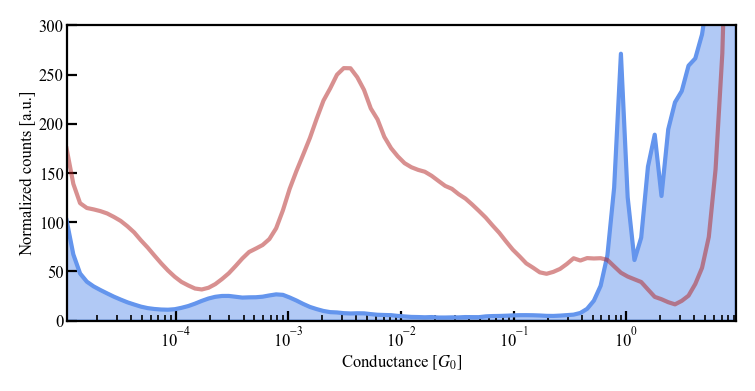

In [5]:
ax = hist.plot_hist_1d(dpi=200)
ax.set_ylim(0, 300)

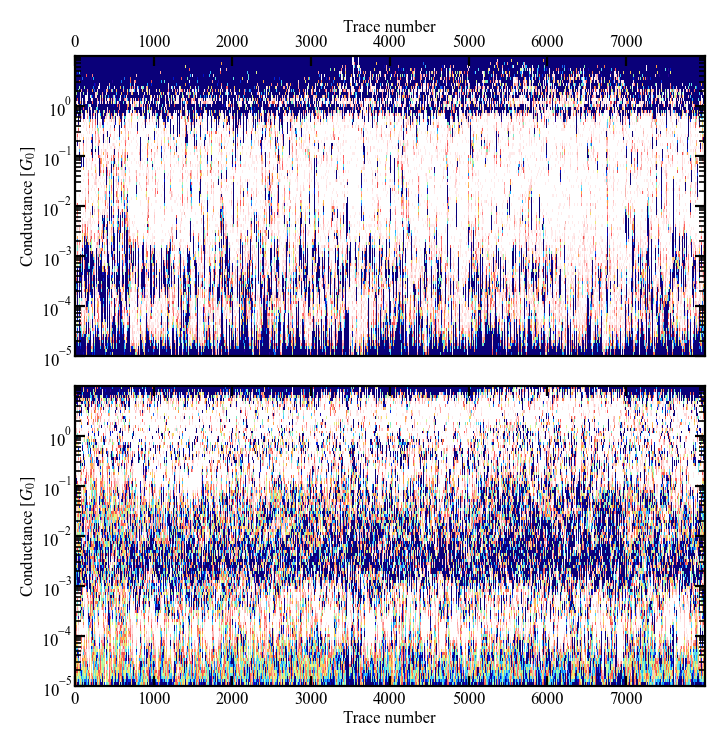

In [6]:
ax_temp_pull, ax_temp_push = hist.plot_temporal_hist(vmax_pull=30, vmax_push=200, dpi=200)

(<AxesSubplot:xlabel='Conductance $[G_{0}]$', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:>)

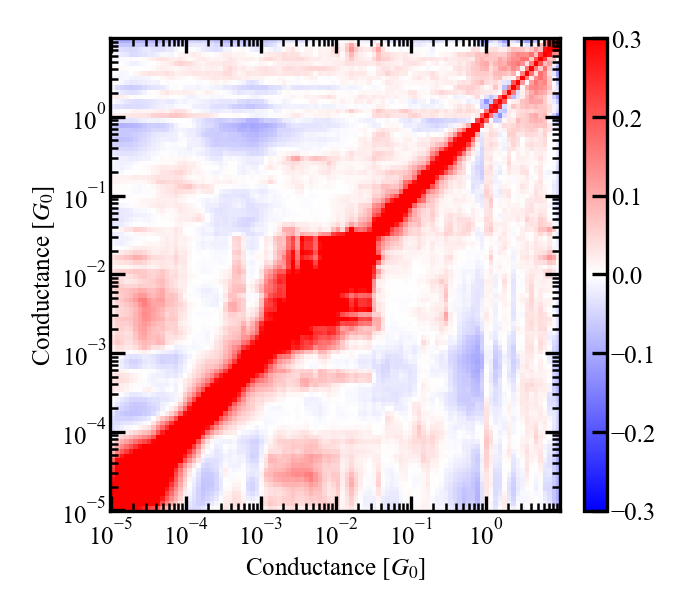

In [7]:
hist.plot_corr(mode='pull', dpi=300, vmin=-0.3, vmax=0.3)

# PCA

In [8]:
# pc = PCA(hist=hist, num_of_pcs=5)
# pc.calc_principal_components(direction='pull')

In [9]:
pc = PCA(hist='hist_1d_total_for_pc_20.h5', load_from='pc_20.h5', load_trace_hists=True, folder=home_folder)

(1e-05, 10)

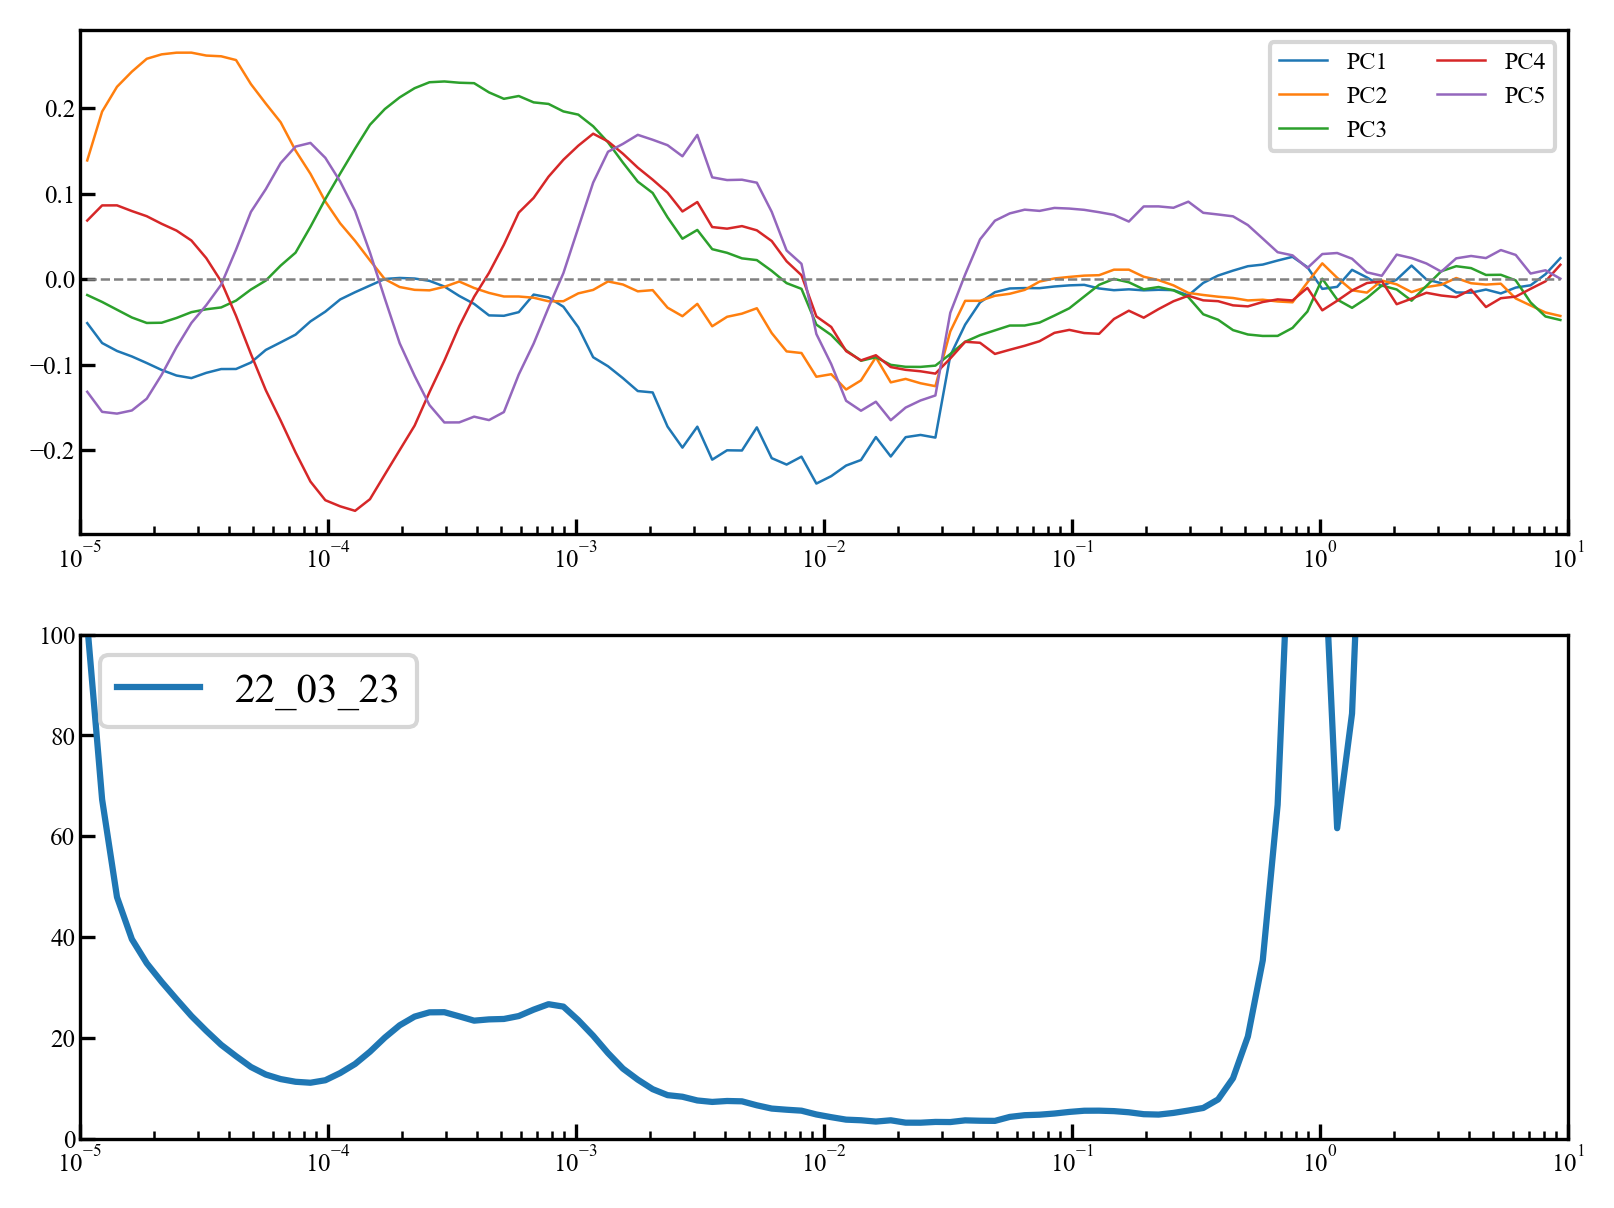

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300)
ax1 = pc.plot_pcs(ax=ax1)
# par = ax.twinx()
ax2.plot(hist.hist_1d_bins, hist.hist_1d_pull, label='22_03_23')
ax2.set_ylim(0, 100)

# ax2.plot(nori_hist_bins, nori_hist_1d*3, label='Nóri')
ax2.legend()
ax2.set_xscale('log')
ax1.set_xlim(1e-5, 10)
ax2.set_xlim(1e-5, 10)

In [11]:
# pc.project_to_pcs()
# pc.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)
# pc.select_percentage(percentage=20, calc_histograms=True)

In [12]:
# pc.calc_group_histograms()
# pc20_hist_group1 = pc.hist_group1.copy()
# pc20_hist_group2 = pc.hist_group2.copy()

In [13]:
# pc.save_principal_components(fname='pc_20.h5', save_trace_hists=True)

In [14]:
pc.traces_group1['PC1']

array([43604, 43603, 39449, ..., 39706, 39099, 39076])

In [15]:
pc.pc_keys

('PC1', 'PC2', 'PC3', 'PC4', 'PC5')

In [16]:
any([i not in pc.pc_keys for i in ('PC4',)])

False

In [17]:
pc.calc_group_histograms(chosen_pc=('PC4',),
                         conductance_range=(1e-2, 10.01),
                         conductance_bins_num=100,
                         conductance_log_scale=False,
                         conductance_bins_mode=None)

Calculating 1D and 2D histograms of PC4 group1.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC4 group2.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces


In [24]:
hist_all = Histogram(folder=home_folder,
                     traces=after_evap[:8000],  #8000
                     conductance_range=(0.01, 10.01),  # 4.229e-5
                     conductance_bins_num=100, # 200-500 bin
                     conductance_log_scale=False,
                     conductance_bins_mode='total')

hist_all.calc_hist_1d()

  0%|          | 0/8000 [00:00<?, ?it/s]

In [53]:
hist_all.calc_temporal_hist()

In [54]:
hist_all.calc_corr_hist_2d()

  0%|          | 0/8000 [00:00<?, ?it/s]

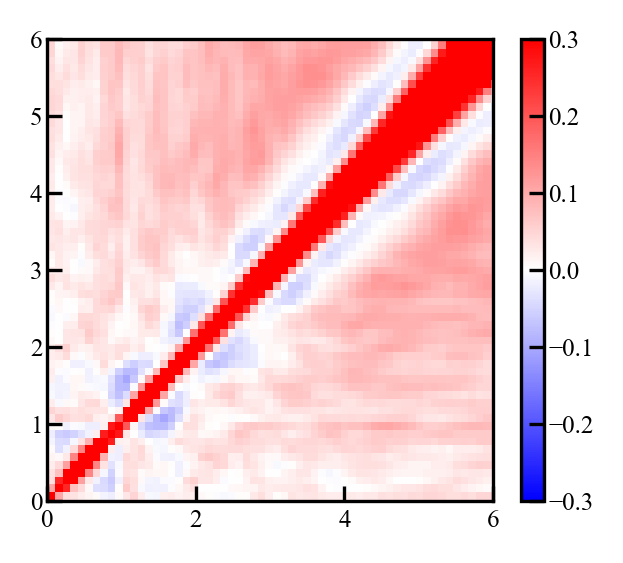

In [65]:
fig, ax, = plt.subplots(1, dpi=300, figsize=(2.4,2))
x_mesh, y_mesh = np.meshgrid(hist_all.hist_1d_bins, hist_all.hist_1d_bins)
im_norm = ax.pcolormesh(x_mesh, y_mesh, hist_all.corr_2d_pull, cmap='bwr', vmin=-0.3, vmax=0.3)
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
plt.colorbar(im_norm)

In [66]:
pc = PCA(hist=hist_all, num_of_pcs=5)
pc.calc_principal_components(direction='pull')

(0.01, 10.01)

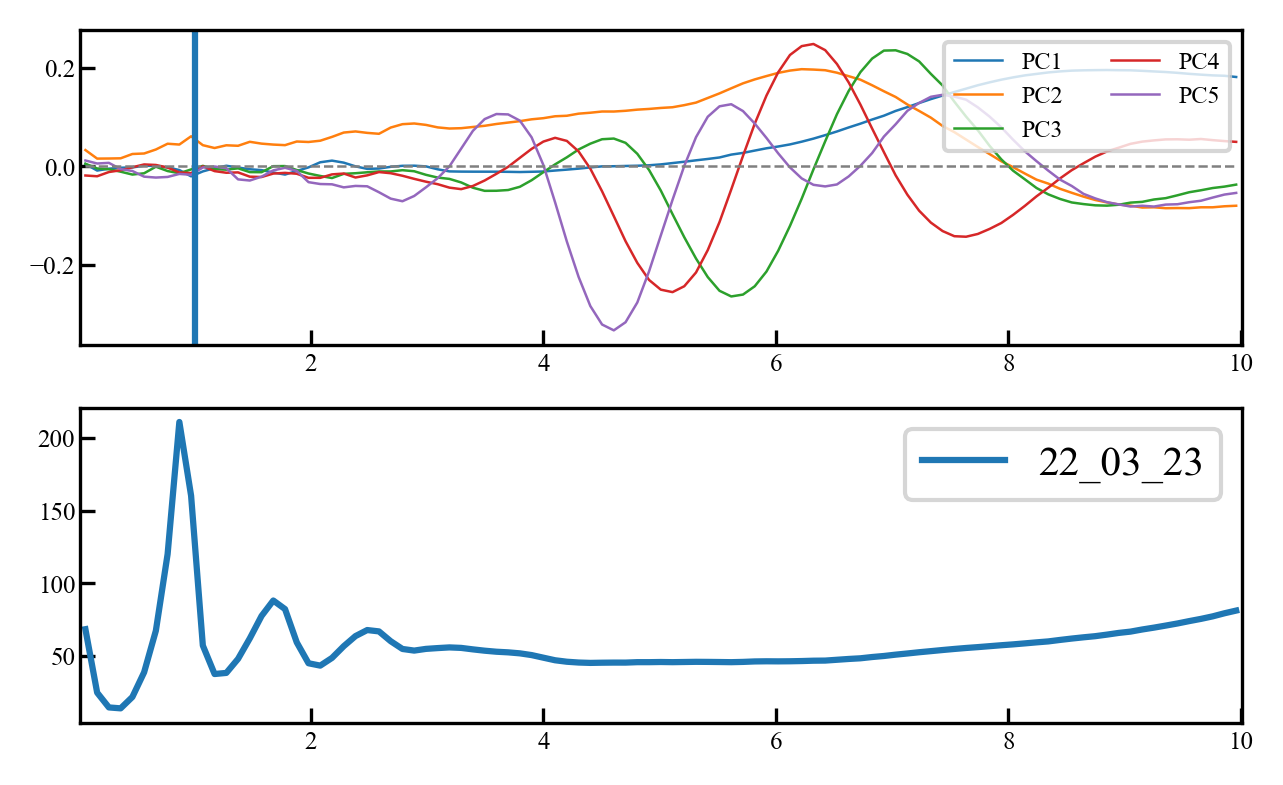

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300, figsize=(5, 3))
ax1 = pc.plot_pcs(ax=ax1)
ax1.set_xscale('linear')
# par = ax.twinx()
ax2.plot(hist_all.hist_1d_bins, hist_all.hist_1d_pull, label='22_03_23')
# ax2.set_ylim(0, 100)
ax1.axvline(1)
# ax2.plot(nori_hist_bins, nori_hist_1d*3, label='Nóri')
ax2.legend()
# ax2.set_xscale('log')
ax1.set_xlim(0.01, 10.01)
ax2.set_xlim(0.01, 10.01)

In [78]:
pc.project_to_pcs()
pc.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)
pc.select_percentage(percentage=20, calc_histograms=True)

Calculating the projections to PCs.:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [82]:
pc.traces_group1['PC3']

array([39530, 39538, 43832, ..., 42173, 40480, 41228])

In [86]:
hist_group1 = Histogram(traces=pc.traces_group1['PC2'], folder=home_folder,
                        conductance_range=(1e-5, 10),
                        conductance_bins_num=100,
                        conductance_log_scale=True,
                        conductance_bins_mode='total')

hist_group2 = Histogram(traces=pc.traces_group2['PC2'], folder=home_folder,
                        conductance_range=(1e-5, 10),
                        conductance_bins_num=100,
                        conductance_log_scale=True,
                        conductance_bins_mode='total')

hist_group1.calc_hist_1d()
hist_group2.calc_hist_1d()

  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

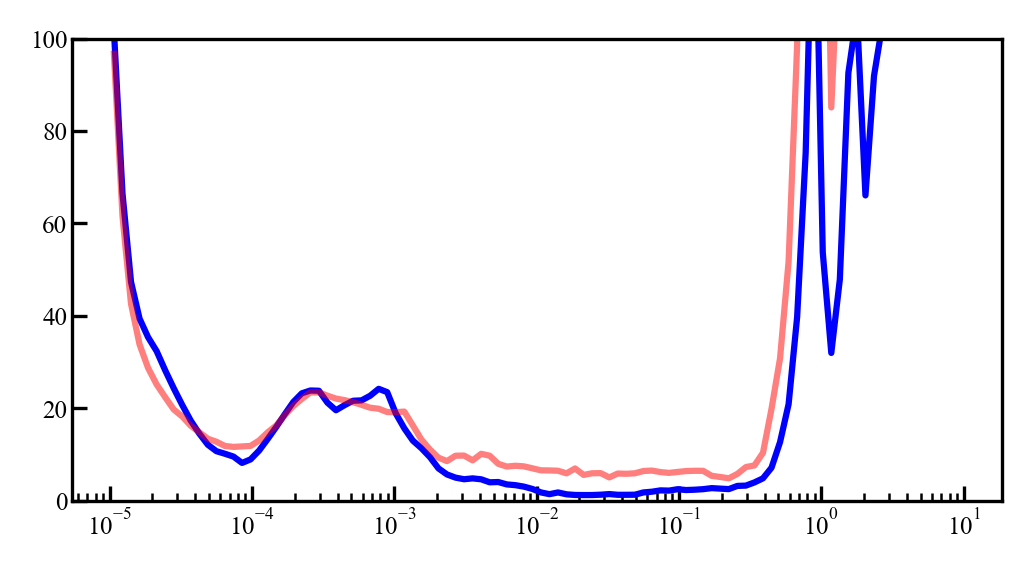

In [96]:
fig, ax = plt.subplots(1, dpi=300, figsize=(4, 2))

# ax.fill_between(hist_all.hist_1d_bins, np.zeros_like(hist_all.hist_1d_pull), hist_all.hist_1d_pull, color='cornflowerblue')
ax.plot(hist_group1.hist_1d_bins, hist_group1.hist_1d_pull, c='b')
ax.plot(hist_group2.hist_1d_bins, hist_group2.hist_1d_pull, c='r', alpha=0.5)
ax.set_xticks(np.arange(0, 11, 0.5))
# ax.set_xlim(0, 10)
ax.set_ylim(0, 100)
ax.set_xscale('log')
# ax.axvline(1, ls='--', lw=1, c='grey')
# ax.axvline(0.86, ls='--', lw=1, c='r')

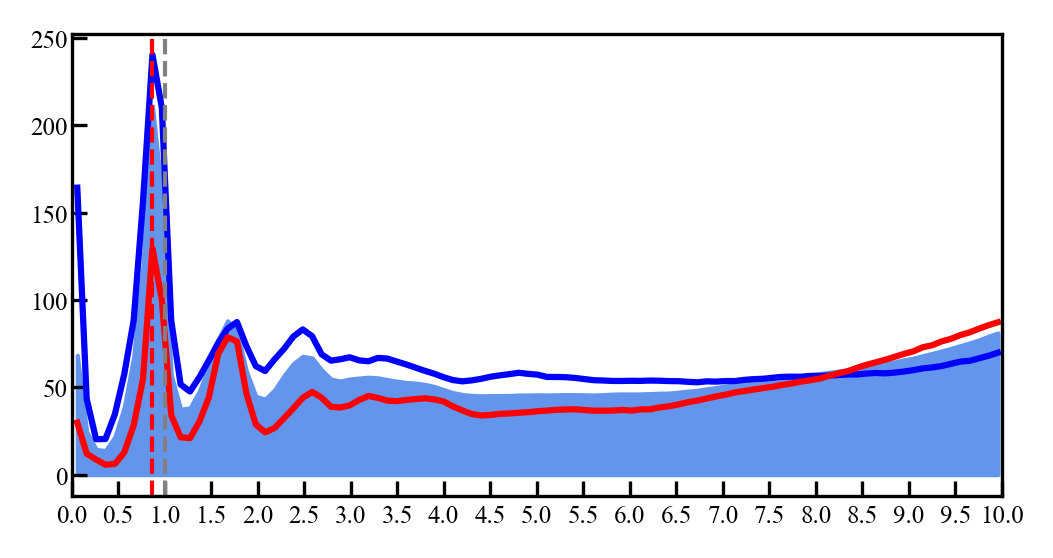

In [36]:
fig, ax = plt.subplots(1, dpi=300, figsize=(4, 2))

ax.fill_between(hist_all.hist_1d_bins, np.zeros_like(hist_all.hist_1d_pull), hist_all.hist_1d_pull, color='cornflowerblue')
ax.plot(pc.hist_group1['PC4'].hist_1d_bins, pc.hist_group1['PC4'].hist_1d_pull, c='b')
ax.plot(pc.hist_group2['PC4'].hist_1d_bins, pc.hist_group2['PC4'].hist_1d_pull, c='r')
ax.set_xticks(np.arange(0, 11, 0.5))
ax.set_xlim(0, 10)
ax.axvline(1, ls='--', lw=1, c='grey')
ax.axvline(0.86, ls='--', lw=1, c='r')

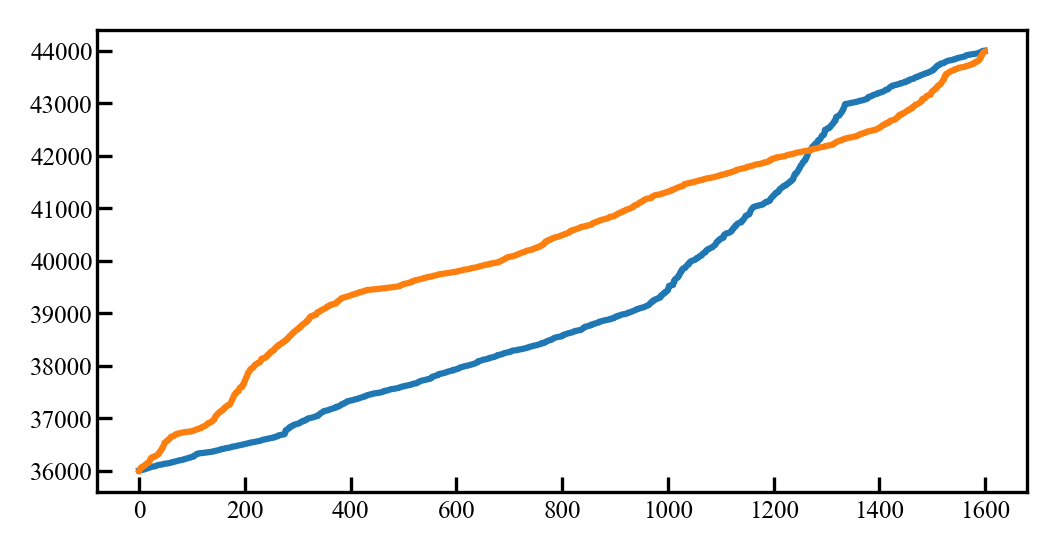

In [50]:
fig, ax = plt.subplots(1, dpi=300, figsize=(4, 2))
ax.plot(sorted(pc.traces_group1['PC4']))
ax.plot(sorted(pc.traces_group2['PC4']))

group1_bins, group1_hist = utils.calc_hist_1d_single(pc.traces_group1['PC4'], xrange=(36000, 44000), xbins_num=500)
group2_bins, group2_hist = utils.calc_hist_1d_single(pc.traces_group1['PC4'], xrange=(36000, 44000), xbins_num=500)

In [ ]:
fig, ax = plt.subplots(1, dpi=300, figsize=(4, 2))
ax.plot(sorted(pc.traces_group1['PC4']))
ax.plot(sorted(pc.traces_group2['PC4']))

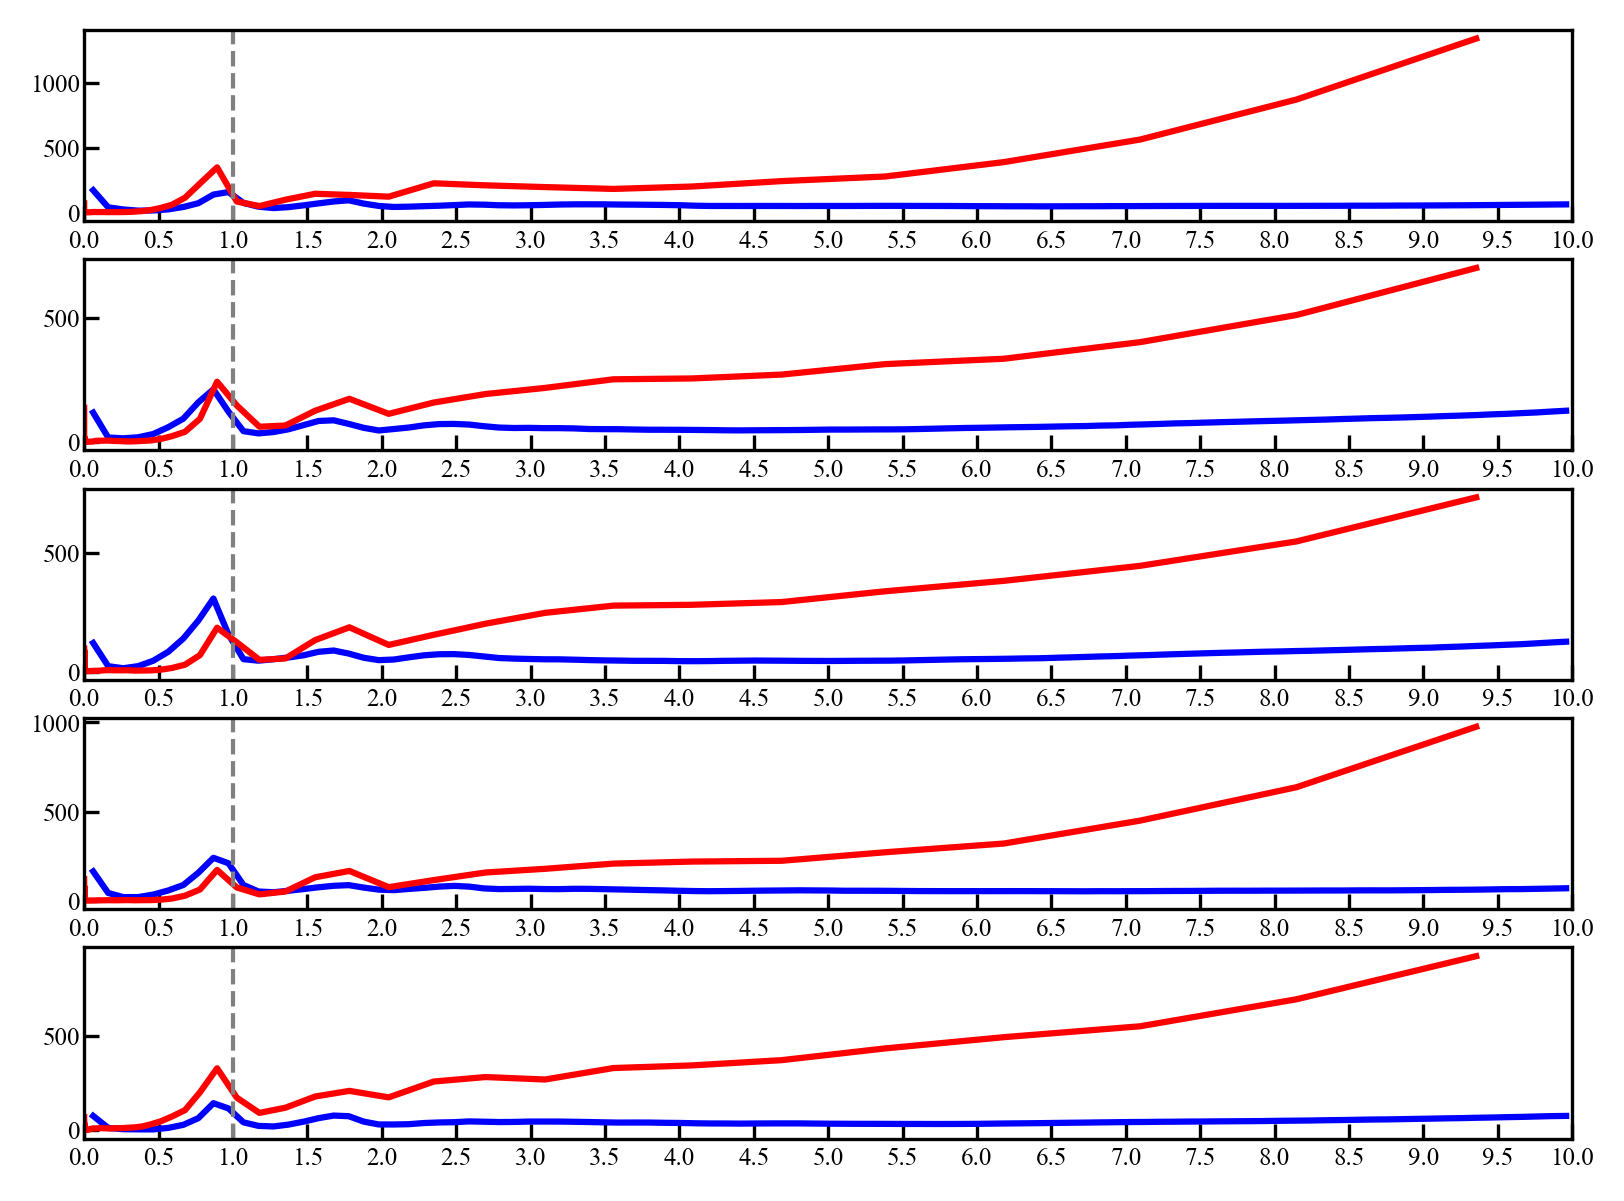

In [28]:
# fig, ax = plt.subplots(5, dpi=300)

# for i, pc_key in enumerate(pc.pc_keys):
#     ax[i].plot(pc.hist_group1[pc_key].hist_1d_bins, pc.hist_group1[pc_key].hist_1d_pull, c='b')
#     ax[i].plot(pc.hist_group2[pc_key].hist_1d_bins, pc.hist_group2[pc_key].hist_1d_pull, c='r')
#     ax[i].set_xticks(np.arange(0, 11, 0.5))
#     ax[i].set_xlim(0, 10)
#     ax[i].axvline(1, ls='--', lw=1, c='grey')

In [3]:
trace_pair=TracePair(after_evap[0], load_from=home_folder)

In [4]:
conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
    temporal_noise_single_trace(trace_pair=trace_pair, align_at=2e-2, interpolate=False,
                                win_size=256, step_size=None, skip_points=50, end_point=3000,
                                tolerance=2, filter_method='start-end', freq_range=(2000, 5000))

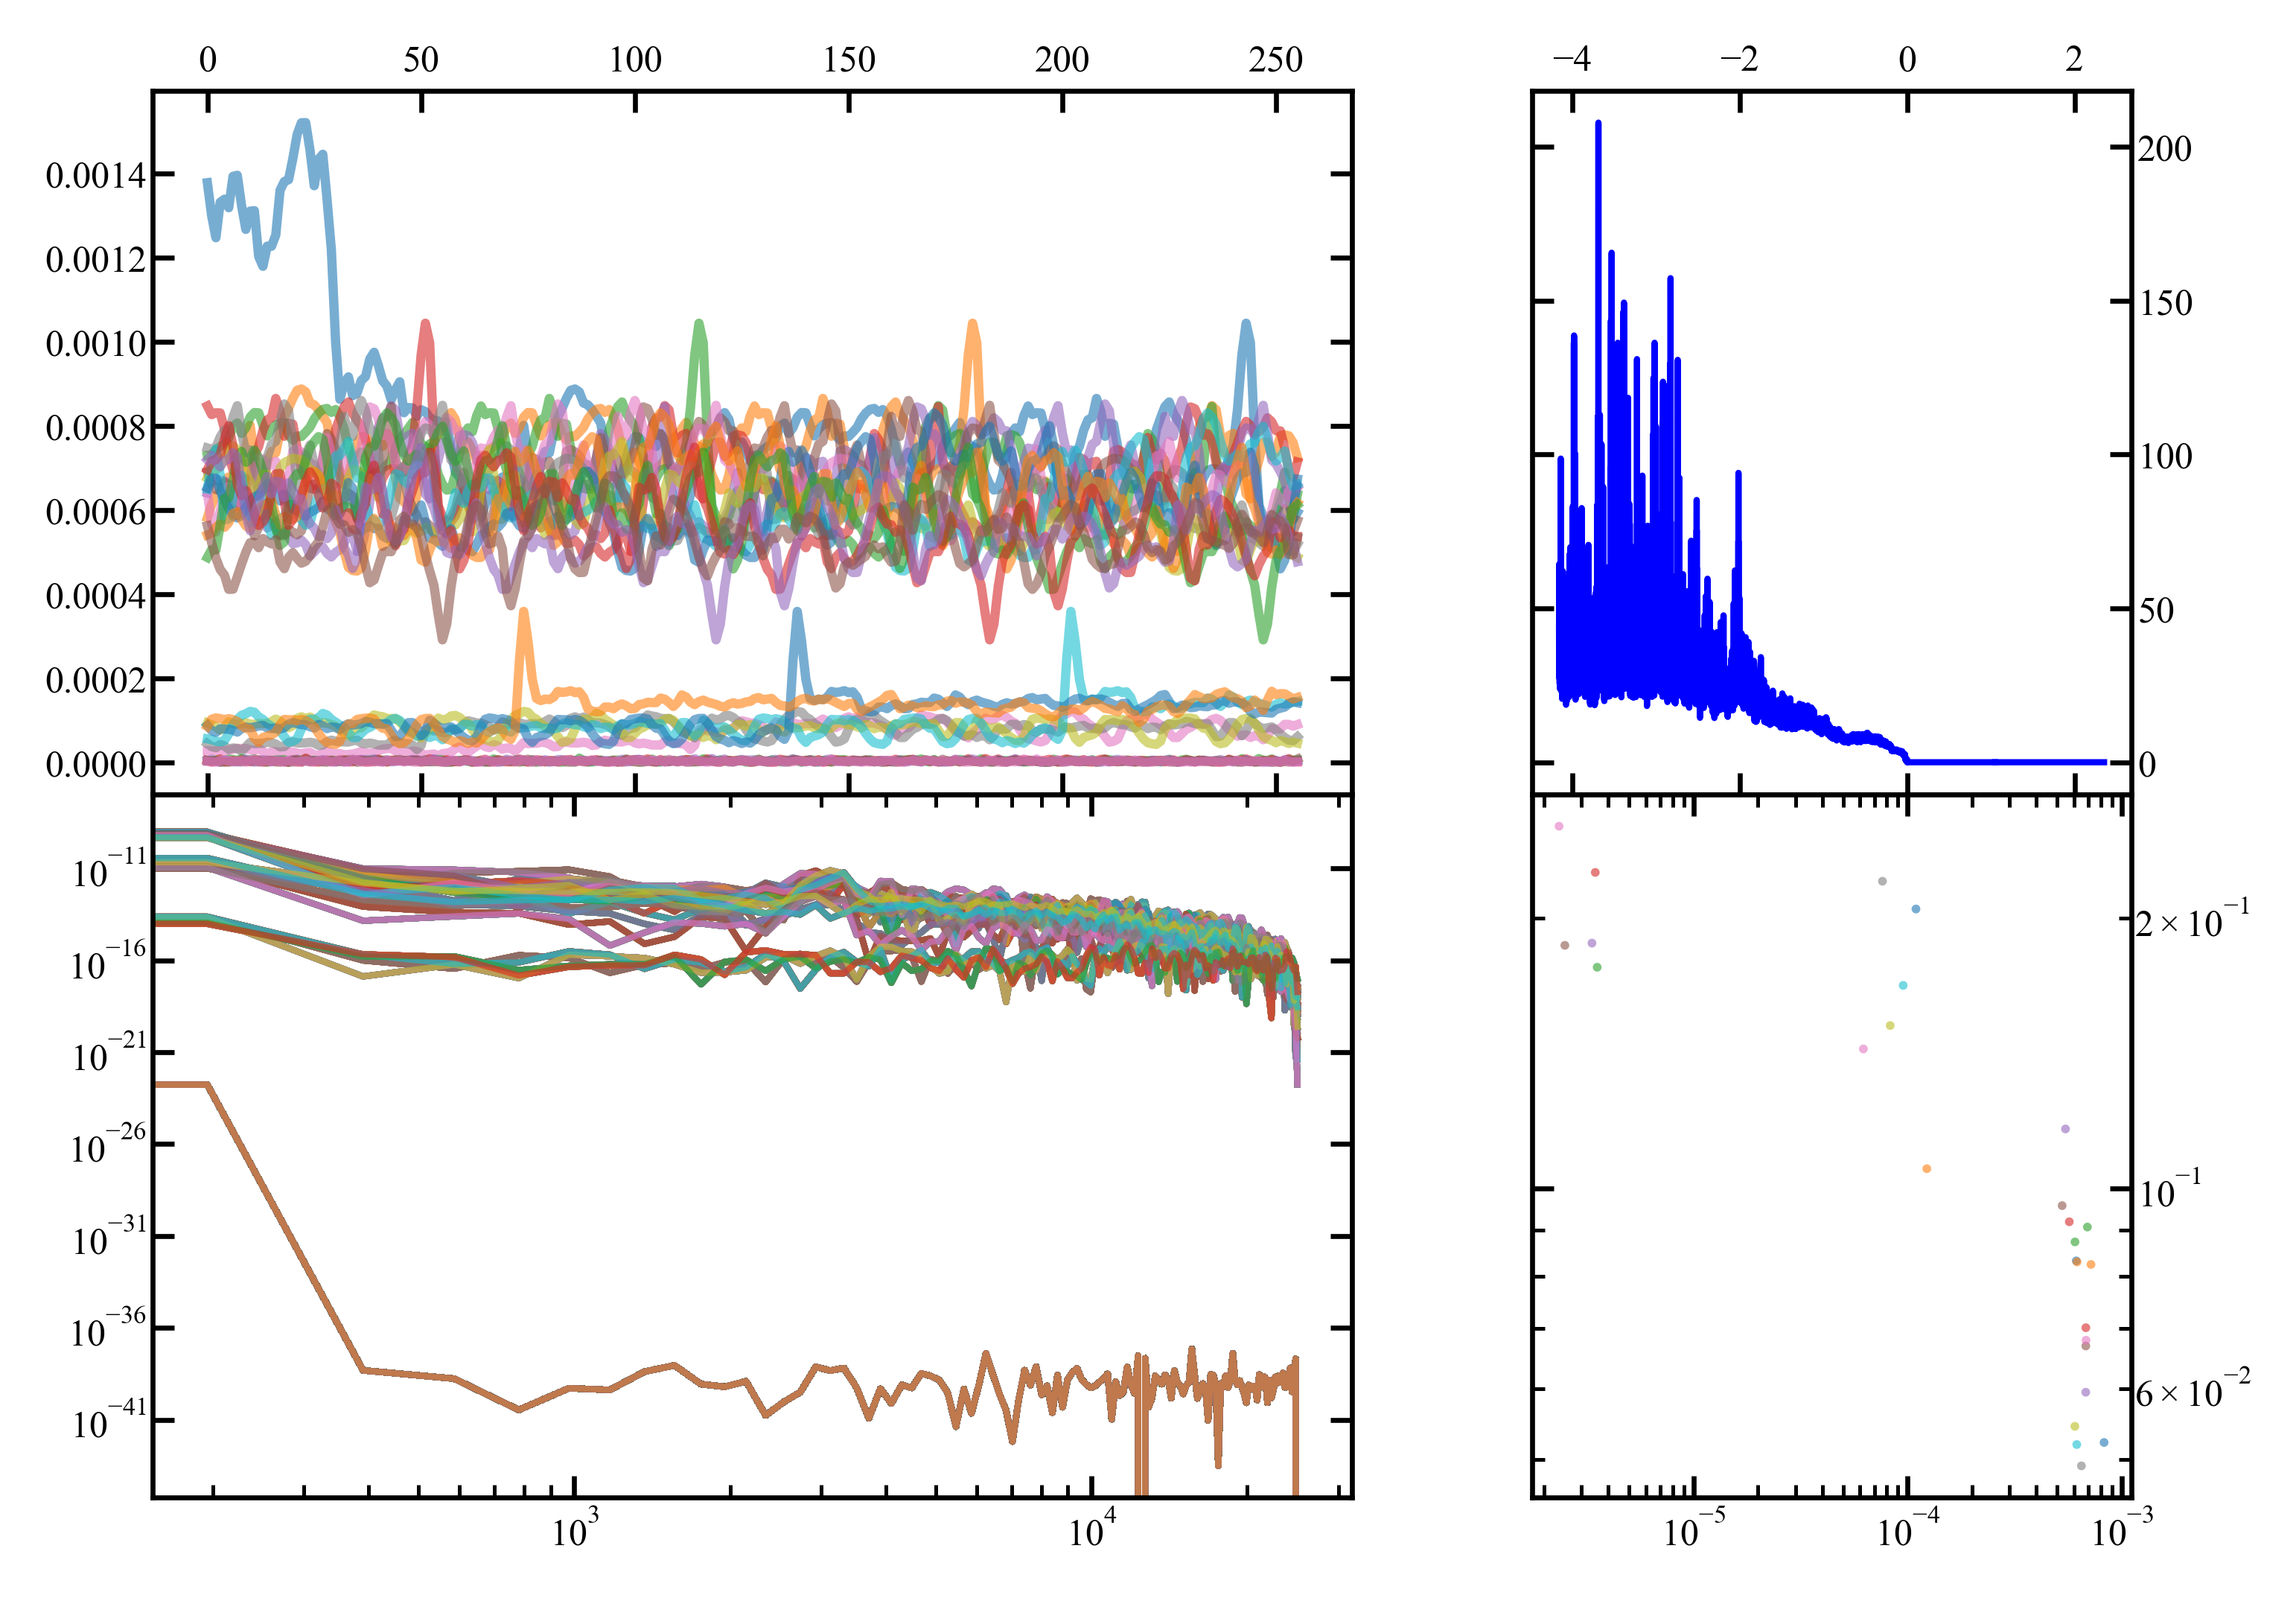

In [5]:
plot_temporal_noise_single_trace(trace_pair, psd_intervals, fft_freqs, psd_results, avg_conductance_in_win, areas,
                                     noise_type='dG/G')

In [6]:
areas

[-1e-10,
 -1e-10,
 1.873196431623799e-09,
 3.514875355176491e-09,
 3.939722148310352e-09,
 2.2767864497074e-09,
 1.6333691797809832e-09,
 2.0710698891335863e-09,
 2.1447533186333346e-09,
 1.0207154950113928e-09,
 1.085011585589372e-09,
 1.0302401743698588e-09,
 2.6085163235286397e-09,
 2.640083925924761e-09,
 2.796361760126552e-09,
 2.7418068151250267e-09,
 4.063928799176545e-09,
 2.553805090360434e-09,
 -1e-10,
 -1e-10,
 -1e-10,
 -1e-10,
 7.913952003729895e-11,
 2.814896993501867e-10,
 1.5885093743693597e-10,
 2.579535469756182e-10,
 5.018513683440054e-10,
 1.677899850502501e-10,
 -1e-10,
 -1e-10,
 -1e-10,
 -1e-10,
 -1e-10,
 -1e-10,
 -1e-10,
 3.9157979079490026e-13,
 6.10403024395435e-13,
 3.9598403738760876e-13,
 -1e-10,
 -1e-10,
 2.184325949713172e-13,
 3.546646426053481e-13]